### *Задание*

-----

<br>

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source). Таким образом после вашего анализа, я хочу увидеть небольшое описание нашего целевого клиента с соответствующими визуализациями и статистическими выводами, что мы и прошли с вами на лекции. Используйте по максимуму ваши знания работы с датасетом (обработка, предобработка и приведение его к виду с которым можно работать).

<br>

Критерии оценки задания:

1. Правильность и **подкрепленность выводами вашего статистического анализа** (используйте весь доступный вам инструментарий, какой - решите самостоятельно).
2. Корректность использования графиков при графическом анализе. Не надо визуализировать все, что у вас есть в датасете, **подумайте какие признаки и какие взамосвязи можно и нужно показать, какие распределения важно отобразить.**
3. Оформление и **эффективное использование кода.**

**Максимальный балл за решение текущего задания 5 баллов.**

Покажите, как вы можете самостоятельно работать с данными и ваше аналитическое мышление, подкрепленное цифрами и соответствующими выводами.
Удачи.

<div align="center"> <font size="5"> <b>Data cleaning and reprocessing</b> </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
import missingno as msno
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 30)


In [2]:
data = pd.read_csv('clients.csv')

 building - колиечетсво комнат
 

In [3]:
data.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,Individual,Madalyn,Mercer,19.0,18-25,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,Individual,Lara,Carrillo,22.0,18-25,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,Individual,Donavan,Flowers,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,Individual,Darien,Dorsey,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,Individual,Alessandra,Perry,25.0,18-25,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [5]:
data.dtypes

ID                           int64
Building                     int64
Year of sale                 int64
Month of sale                int64
Type of property            object
Property number              int64
Area (ft.)                 float64
Price                       object
Status                      object
Customer ID                 object
Entity                      object
Name                        object
Surname                     object
Age at time of purchase    float64
Age Interval                object
Y                          float64
M                          float64
D                          float64
Gender                      object
Country                     object
State                       object
Purpose                     object
Deal satisfaction            int64
Mortgage                    object
Source                      object
dtype: object

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,195.0,2591.425641,1244.617996,1002.00,2003.50,2054.00,3048.50,5051.0
Building,195.0,2.564103,1.243434,1.00,2.00,2.00,3.00,5.0
Year of sale,195.0,2006.333333,1.072941,2004.00,2006.00,2007.00,2007.00,2010.0
Month of sale,195.0,7.271795,3.378674,1.00,4.00,8.00,10.00,12.0
Property number,195.0,27.328205,14.830832,1.00,15.00,27.00,39.00,59.0
Area (ft.),195.0,899.867128,261.489550,410.71,739.86,785.48,1075.46,1942.5
Age at time of purchase,178.0,46.151685,12.841692,19.00,37.00,45.00,55.00,76.0
Y,178.0,1960.325843,12.835575,1931.00,1950.25,1962.00,1969.75,1986.0
M,178.0,6.752809,3.450312,1.00,4.00,6.00,9.75,15.0
D,178.0,15.449438,8.457285,1.00,8.00,15.00,23.75,31.0


In [7]:
data.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval ',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

In [8]:
data.columns = data.columns.str.replace(' ', '_')

In [9]:
data.rename(columns={'Area_(ft.)': 'Area','Building':'Rooms','Age_Interval_':'Age_Interval'}, inplace= True)

In [10]:
data['Status'].value_counts()

Status
 Sold     195
Name: count, dtype: int64

In [11]:
del data['Status']

In [12]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in data.columns if data[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
        missing_percent[col] = per
    return missing_percent

In [13]:
_ = get_numerical_summary(data)

Age_at_time_of_purchase : 17 (8.718%)
Age_Interval : 17 (8.718%)
Y : 17 (8.718%)
M : 17 (8.718%)
D : 17 (8.718%)
Gender : 17 (8.718%)
State : 14 (7.179%)


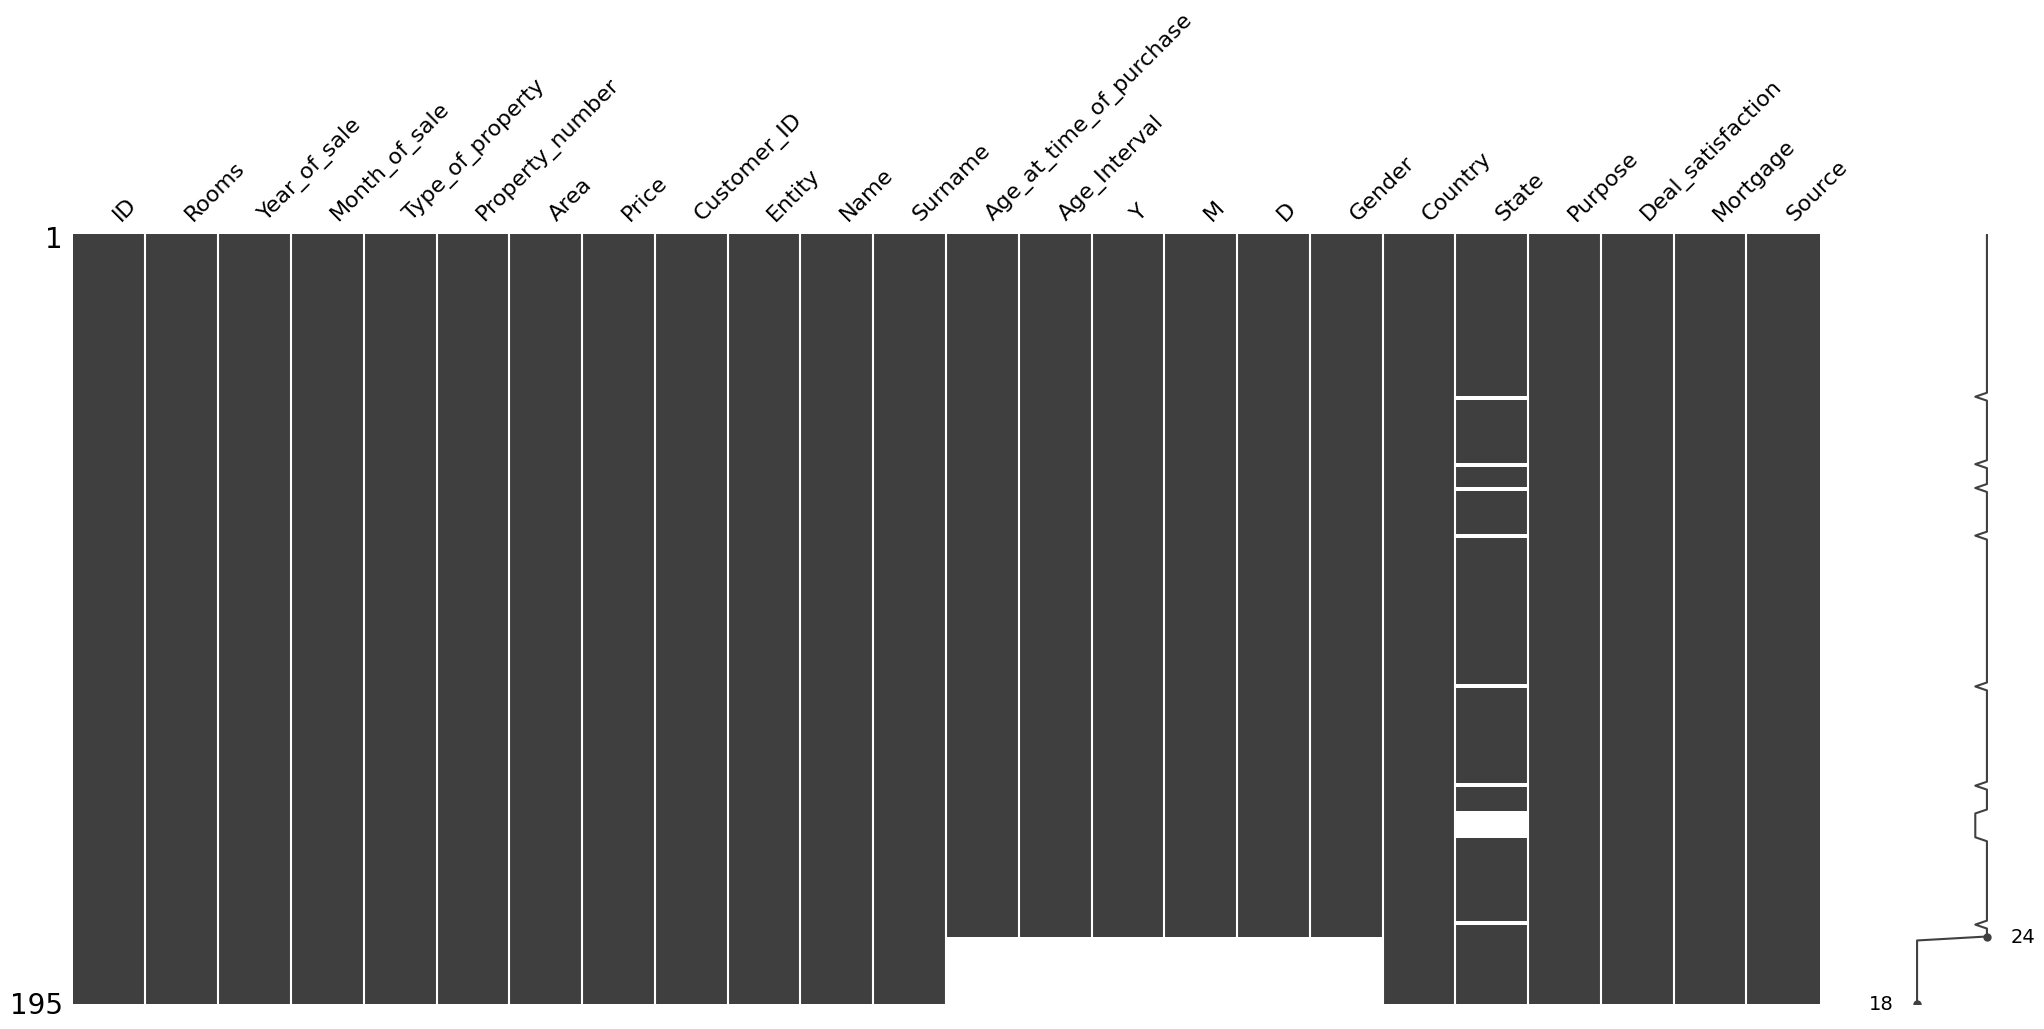

<Figure size 400x400 with 0 Axes>

In [14]:
msno.matrix(data)
plt.figure(figsize = (4,4))
plt.show()

In [15]:
data[data['M']>12]

,ID,Rooms,Year_of_sale,Month_of_sale,Type_of_property,Property_number,Area,Price,Customer_ID,Entity,Name,Surname,Age_at_time_of_purchase,Age_Interval,Y,M,D,Gender,Country,State,Purpose,Deal_satisfaction,Mortgage,Source
140,5050,5,2007,11,Apartment,50,1093.0,"$ 390,494.27",C0140,Individual,Aniya,Miller,57.0,56-65,1950.0,15.0,2.0,F,USA,Nevada,Home,3,No,Website


In [16]:
data['M'].replace(15,3,inplace=True)

In [17]:
data['Year_of_sale'] = pd.to_datetime({'Year':data['Year_of_sale'],'Month':data['Month_of_sale'],'Day':1})
data['Y'] = pd.to_datetime({'Year':data['Y'],'Month':data['M'],'Day':data['D']})
data.rename(columns={'Year_of_sale':'Sale_date','Y':'Birthday'},inplace= True)
data.drop(columns={'D','M','Month_of_sale'},axis=1,inplace= True)

In [18]:
data['Gender'].fillna('Co',inplace= True)
data['State'].fillna('Missing',inplace= True)

In [19]:
data[data['Entity']=='Firm'][['Age_at_time_of_purchase','Sale_date','Birthday','Age_Interval','Gender']]

,Age_at_time_of_purchase,Sale_date,Birthday,Age_Interval,Gender
178,NaN,2004-03-01,NaT,NaN,Co
179,NaN,2004-11-01,NaT,NaN,Co
180,NaN,2004-11-01,NaT,NaN,Co
181,NaN,2005-09-01,NaT,NaN,Co
182,NaN,2005-12-01,NaT,NaN,Co
183,NaN,2005-12-01,NaT,NaN,Co
184,NaN,2006-10-01,NaT,NaN,Co
185,NaN,2004-03-01,NaT,NaN,Co
186,NaN,2005-07-01,NaT,NaN,Co
187,NaN,2005-07-01,NaT,NaN,Co


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       195 non-null    int64         
 1   Rooms                    195 non-null    int64         
 2   Sale_date                195 non-null    datetime64[ns]
 3   Type_of_property         195 non-null    object        
 4   Property_number          195 non-null    int64         
 5   Area                     195 non-null    float64       
 6   Price                    195 non-null    object        
 7   Customer_ID              195 non-null    object        
 8   Entity                   195 non-null    object        
 9   Name                     195 non-null    object        
 10  Surname                  195 non-null    object        
 11  Age_at_time_of_purchase  178 non-null    float64       
 12  Age_Interval             178 non-nul

In [21]:
get_numerical_summary(data)

Age_at_time_of_purchase : 17 (8.718%)
Age_Interval : 17 (8.718%)
Birthday : 17 (8.718%)


{'Age_at_time_of_purchase': 8.717948717948717,
 'Age_Interval': 8.717948717948717,
 'Birthday': 8.717948717948717}

In [22]:
data.head()

,ID,Rooms,Sale_date,Type_of_property,Property_number,Area,Price,Customer_ID,Entity,Name,Surname,Age_at_time_of_purchase,Age_Interval,Birthday,Gender,Country,State,Purpose,Deal_satisfaction,Mortgage,Source
0,1030,1,2005-11-01,Apartment,30,743.09,"$ 246,172.68",C0028,Individual,Madalyn,Mercer,19.0,18-25,1986-06-21,F,USA,California,Home,5,No,Website
1,1029,1,2005-10-01,Apartment,29,756.21,"$ 246,331.90",C0027,Individual,Lara,Carrillo,22.0,18-25,1983-02-24,F,USA,California,Home,5,No,Website
2,2002,2,2007-07-01,Apartment,2,587.28,"$ 209,280.91",C0112,Individual,Donavan,Flowers,22.0,18-25,1985-12-27,M,USA,California,Home,1,Yes,Client
3,2031,2,2007-12-01,Apartment,31,1604.75,"$ 452,667.01",C0160,Individual,Darien,Dorsey,22.0,18-25,1985-12-27,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004-11-01,Apartment,49,1375.45,"$ 467,083.31",C0014,Individual,Alessandra,Perry,25.0,18-25,1979-05-15,F,USA,California,Home,4,No,Agency


In [23]:
data['Mortgage']=[True if col == 'Yes' else False for col in data['Mortgage']]

In [24]:
data['Price']=data['Price'].replace(r'[$,]','',regex=True).astype('float')
data['Country'] = data['Country'].replace(r'\s+','',regex= True)
data['Area'] = data['Area'].apply(lambda x: x/10.764).round(2)

In [25]:
data[['Deal_satisfaction','Rooms']] = data[['Deal_satisfaction','Rooms']].astype('int8')
data[['ID','Property_number']] = data[['ID','Property_number']].astype('int64')

In [26]:
data.head()

,ID,Rooms,Sale_date,Type_of_property,Property_number,Area,Price,Customer_ID,Entity,Name,Surname,Age_at_time_of_purchase,Age_Interval,Birthday,Gender,Country,State,Purpose,Deal_satisfaction,Mortgage,Source
0,1030,1,2005-11-01,Apartment,30,69.03,246172.68,C0028,Individual,Madalyn,Mercer,19.0,18-25,1986-06-21,F,USA,California,Home,5,False,Website
1,1029,1,2005-10-01,Apartment,29,70.25,246331.90,C0027,Individual,Lara,Carrillo,22.0,18-25,1983-02-24,F,USA,California,Home,5,False,Website
2,2002,2,2007-07-01,Apartment,2,54.56,209280.91,C0112,Individual,Donavan,Flowers,22.0,18-25,1985-12-27,M,USA,California,Home,1,True,Client
3,2031,2,2007-12-01,Apartment,31,149.08,452667.01,C0160,Individual,Darien,Dorsey,22.0,18-25,1985-12-27,M,USA,California,Investment,3,True,Website
4,1049,1,2004-11-01,Apartment,49,127.78,467083.31,C0014,Individual,Alessandra,Perry,25.0,18-25,1979-05-15,F,USA,California,Home,4,False,Agency


<div align="center"> <font size="5"> <b>Data visualization</b> </div>

Gender
M     55.0
F     36.0
Co     9.0
Name: proportion, dtype: float64

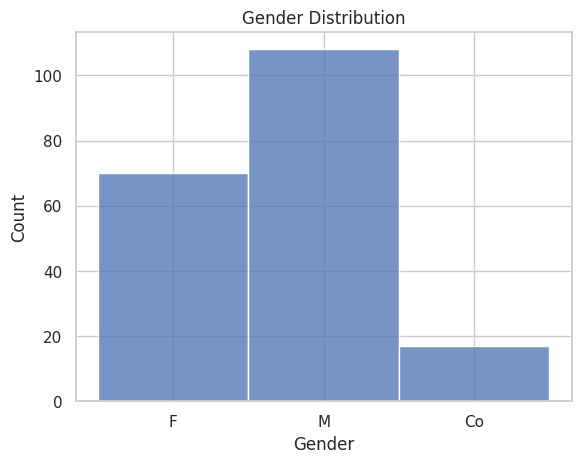

In [42]:
sns.set(style='whitegrid', context='notebook')

sns.histplot(data['Gender'])

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

data['Gender'].value_counts(normalize=True).round(2)*100

<b>The majority of the company’s clients are men, accounting for 55%, while women  make up 36%. Additionally, 9% of the company’s clients are offices.</b>

mean      46.15
median    45.00
max       76.00
min       19.00
Name: Age_at_time_of_purchase, dtype: float64

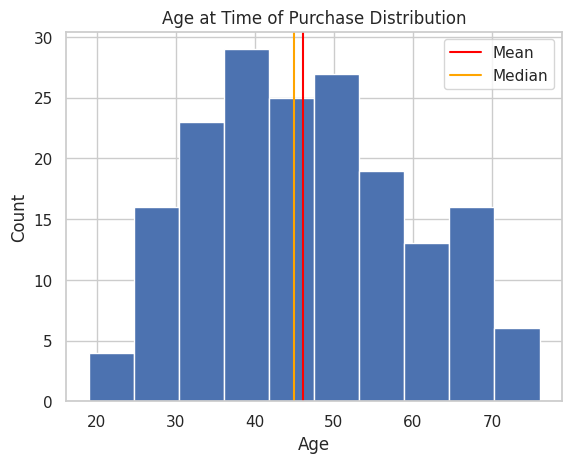

In [43]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(data[data['Entity']=='Individual']['Age_at_time_of_purchase']), color='red',label = 'Mean')
plt.axvline(x = np.median(data[data['Entity']=='Individual']['Age_at_time_of_purchase']), color='orange',label = 'Median')
_  = plt.hist(data['Age_at_time_of_purchase'])

plt.title('Age at Time of Purchase Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()


data[data['Entity']=='Individual']['Age_at_time_of_purchase'].agg(['mean','median','max','min']).round(2)

Text(0, 0.5, 'Count')

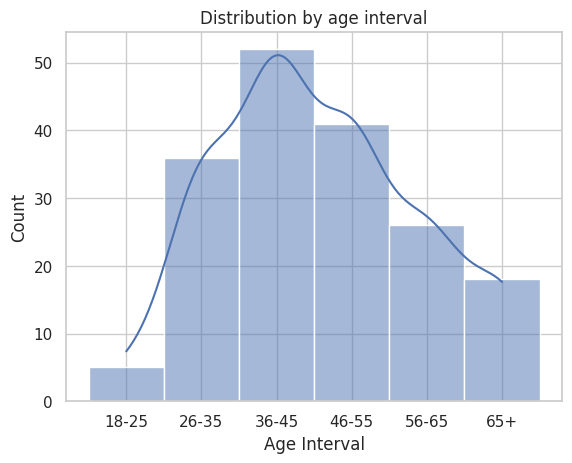

In [44]:
sns.histplot(data[data['Entity']=='Individual']['Age_Interval'], kde=True)

plt.title('Distribution by age interval')
plt.xlabel('Age Interval')
plt.ylabel('Count')

<b>According to these histograms, we can see the distribution of the clients’ ages. The data has some deviations, causing differences between the mean and median values. On average, the age of customers is 45-46. The youngest customer is 19 y.o. and the oldest is 76.</b>

Median Price: 243052.59
 Median Area: 72.97


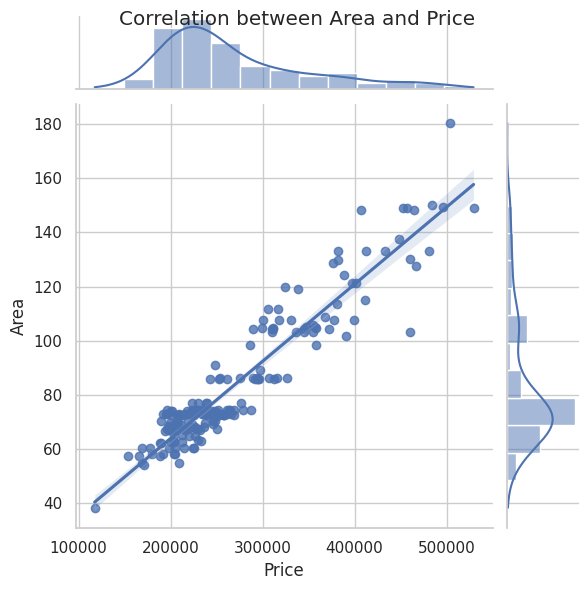

In [45]:
_ = sns.jointplot(x='Price', y='Area', data=data, kind='reg')
_.fig.suptitle('Correlation between Area and Price')

print('Median Price: {}\n Median Area: {}'.format(data['Price'].median(),data['Area'].median()))

Text(0.5, 1.0, 'Boxplot of Price by Entity')

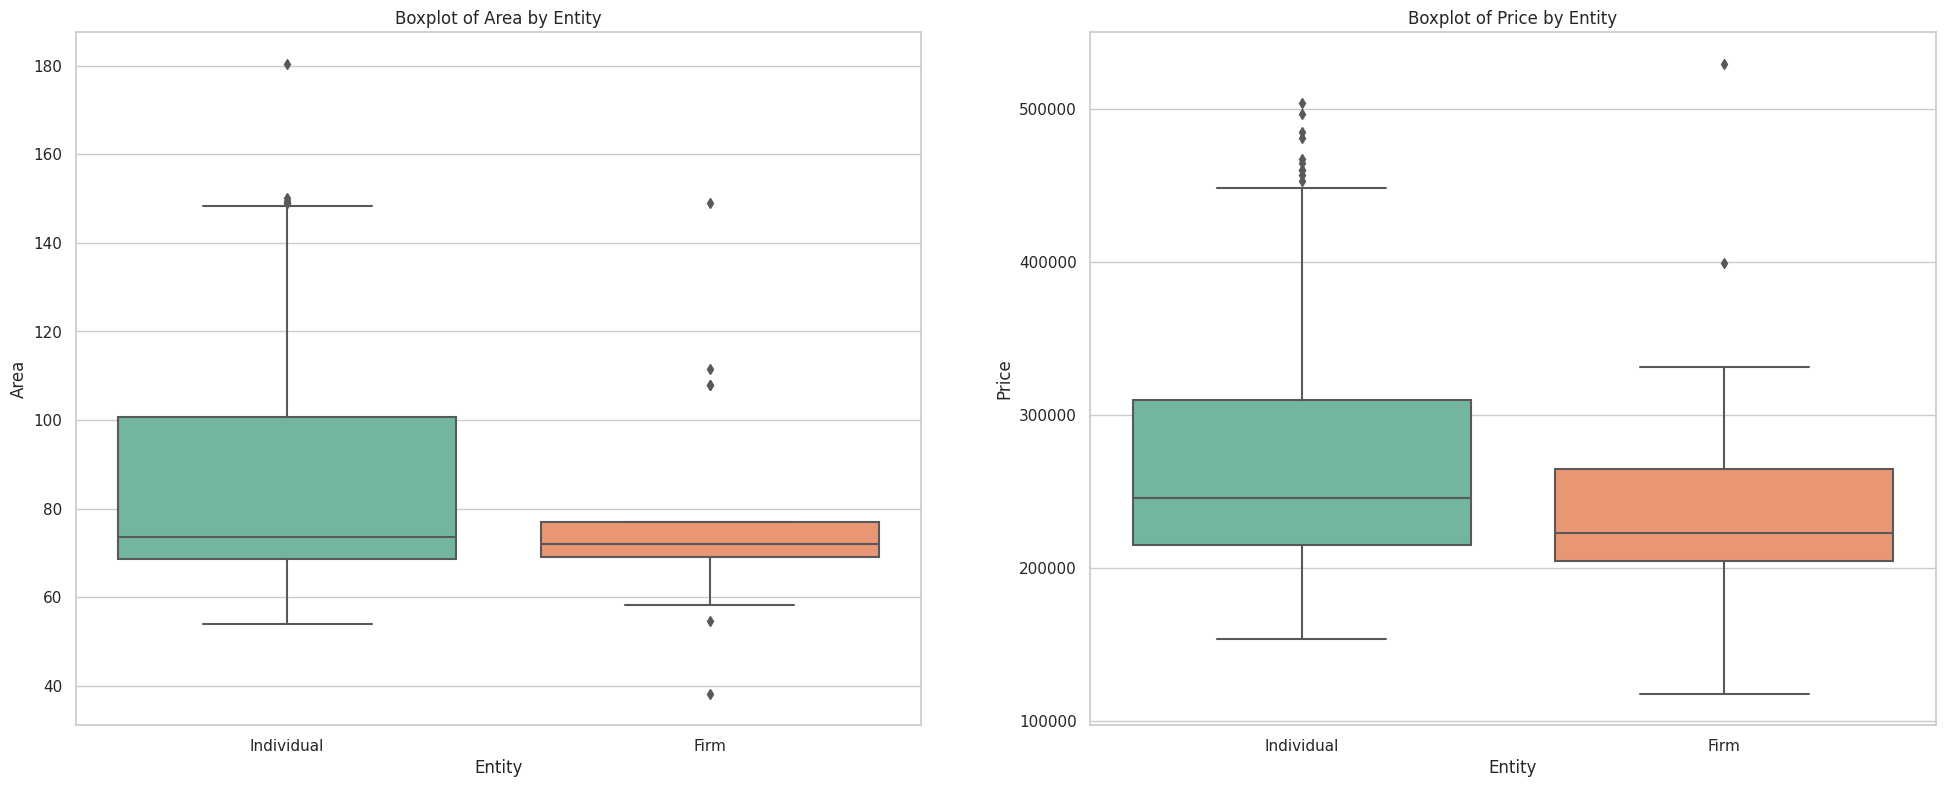

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(24, 9))

sns.boxplot(x='Entity', y='Area', data=data, palette='Set2', ax=ax[0])
sns.boxplot(x='Entity', y='Price', data=data, palette='Set2', ax=ax[1])

ax[0].set_title('Boxplot of Area by Entity')
ax[1].set_title('Boxplot of Price by Entity')


Text(0, 0.5, 'Rooms')

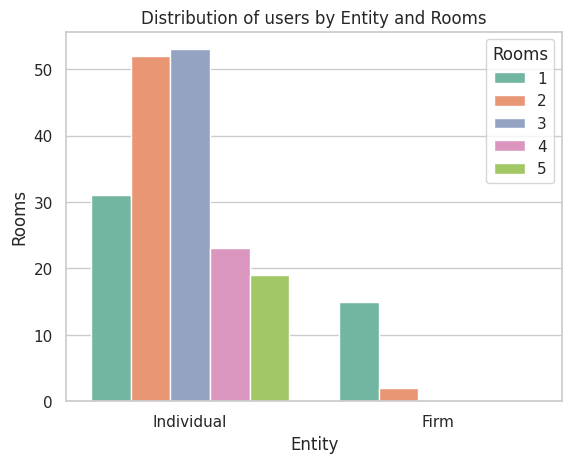

In [47]:
sns.countplot(data=data, x='Entity', hue='Rooms', palette='Set2')

plt.title('Distribution of users by Entity and Rooms')
plt.xlabel('Entity')
plt.ylabel('Rooms')

In [48]:
pd.pivot_table(data,index='Entity',values=['Area','Price'],aggfunc=['min','max','mean','median'])

min                max                  mean                 \
             Area      Price    Area      Price       Area          Price   
Entity                                                                      
Firm        38.16  117564.07  149.08  529317.28  78.597059  253405.505882   
Individual  53.86  153466.71  180.46  503790.23  84.076517  270965.425730   

            median             
              Area      Price  
Entity                         
Firm        72.060  222947.21  
Individual  73.625  245196.73

<b>Based on the charts, we can see that the correlation between Price and Area is positive. As Area increases, so does Price.
The median value for all data is Price = 243052.59 and Area = 72.97.
If we look at the median values by Entity, we can see that the values for Firm are lower than for Individual. 
Its Price = 222947.21, Area = 72.060 for firm and Price = 245196.73, Area = 73.625
Looking at the distribution of Rooms by Entity, we can see that individuals mostly buy 2-3 rooms, while firms buy 1.</b>

Text(0.5, 1.0, 'Purpose')

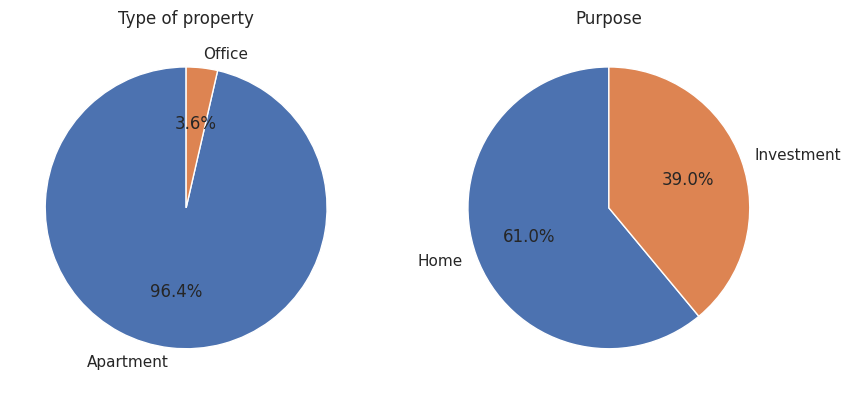

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(data['Type_of_property'].value_counts(), labels=data['Type_of_property'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[1].pie(data['Purpose'].value_counts(), labels=data['Purpose'].value_counts().index, autopct='%1.1f%%', startangle=90)

axs[0].set_title('Type of property')
axs[1].set_title('Purpose')

<b>The majority of users buy an Apartment, accounting for 96.4%, while only 3.6% buy an Office. For most, the purpose of buying real estate was Home. 61% bought it for living and 39% for investment.</b>

<Axes: xlabel='Count', ylabel='State'>

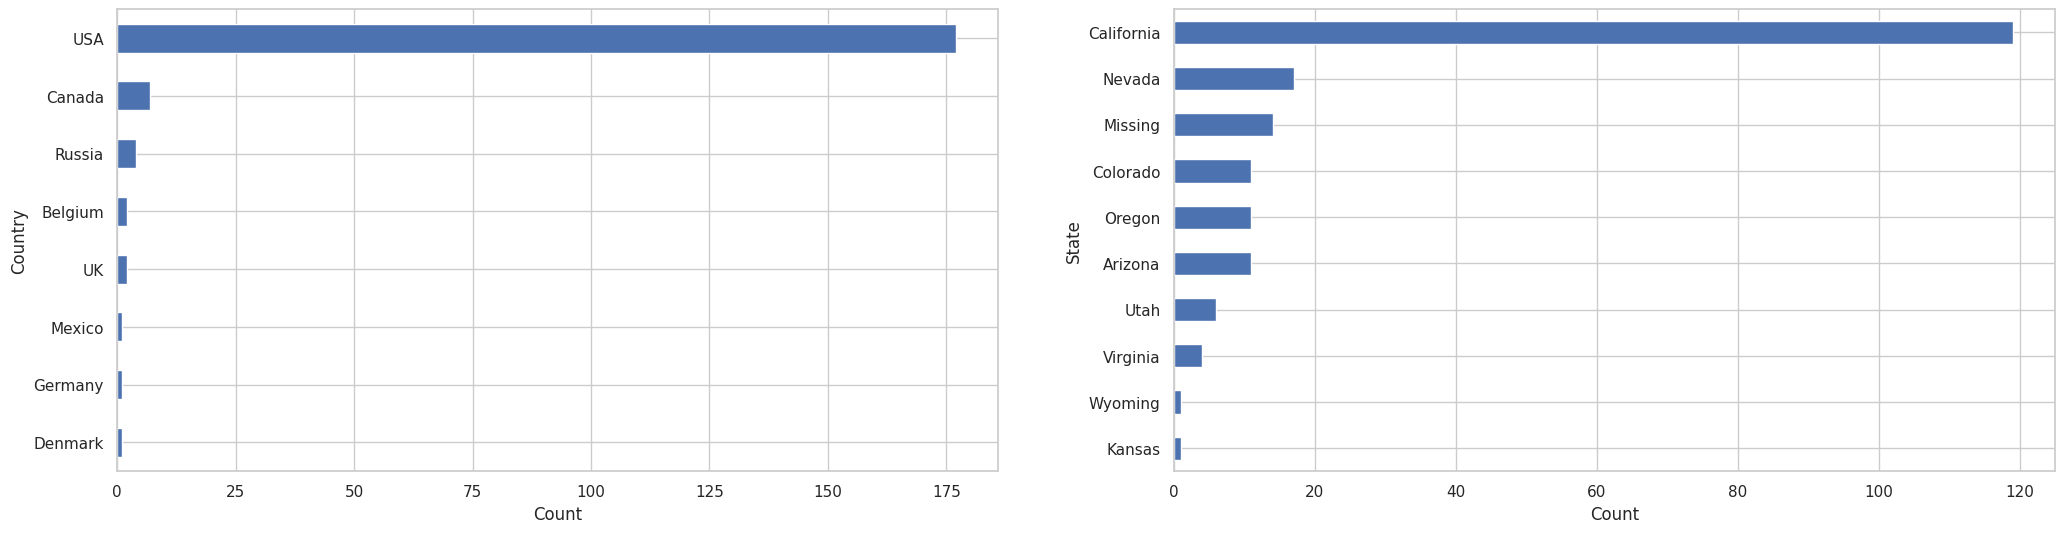

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(25, 6))

data['Country'].value_counts(ascending=True).plot(kind='barh',xlabel='Count',ax=axes[0])
data['State'].value_counts(ascending=True).plot(kind='barh',xlabel='Count', ax=axes[1])


<b>This chart shows the distribution of users by different countries and states. We can see that the majority of users are from the USA and the most common state is California.</b>

Text(0.5, 1.0, 'Source')

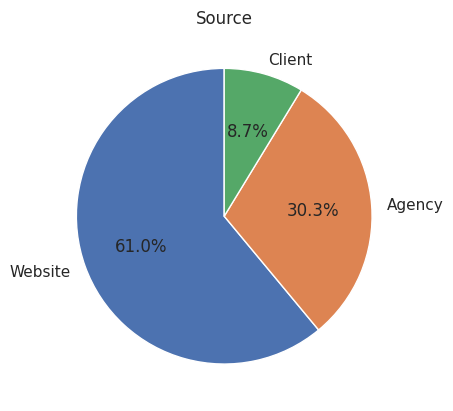

In [51]:
fig, ax = plt.subplots()

plt.pie(data['Source'].value_counts(), labels=data['Source'].value_counts().index, autopct='%1.1f%%', startangle=90)

plt.title('Source')

Text(0, 0.5, 'Number of users')

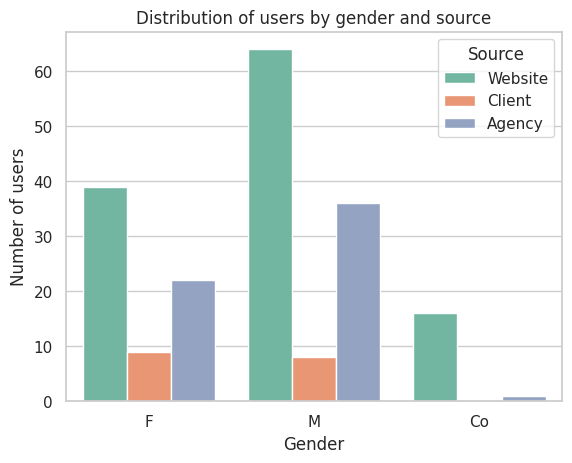

In [52]:
sns.countplot(data=data, x='Gender', hue='Source', palette='Set2')

plt.title('Distribution of users by gender and source')
plt.xlabel('Gender')
plt.ylabel('Number of users')

<b>These diagrams show the distribution of sources among users. For a website it is 61%, for an agency it is 30%, and for a client it is 9%. We can also see the distribution of sources by gender. Most of all, everyone chooses a website</b>

Text(0, 0.5, 'Entity')

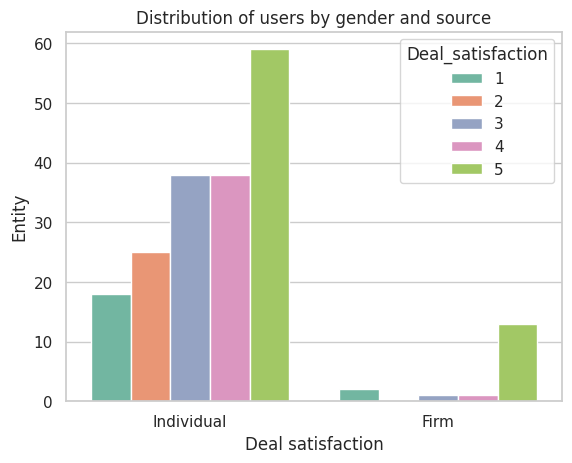

In [53]:
sns.countplot(data=data, x='Entity', hue='Deal_satisfaction', palette='Set2')

plt.title('Distribution of users by gender and source')
plt.xlabel('Deal satisfaction')
plt.ylabel('Entity')

Mean value: 3.61


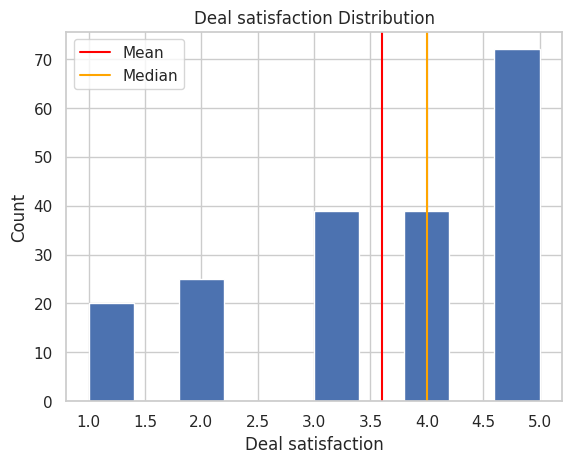

In [54]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(data['Deal_satisfaction']), color='red',label = 'Mean')
plt.axvline(x = np.median(data['Deal_satisfaction']), color='orange',label = 'Median')
_  = plt.hist(data['Deal_satisfaction'])

plt.title('Deal satisfaction Distribution')
plt.xlabel('Deal satisfaction')
plt.ylabel('Count')

plt.legend()

print('Mean value: {}'.format(data['Deal_satisfaction'].mean().round(2)))

<b>On these charts, we can see the distribution of deal satisfaction. In general, a rating of 5 has the highest number among completed deals. The average rating is also high at 3.6 points.</b>

Text(0, 0.5, 'Count')

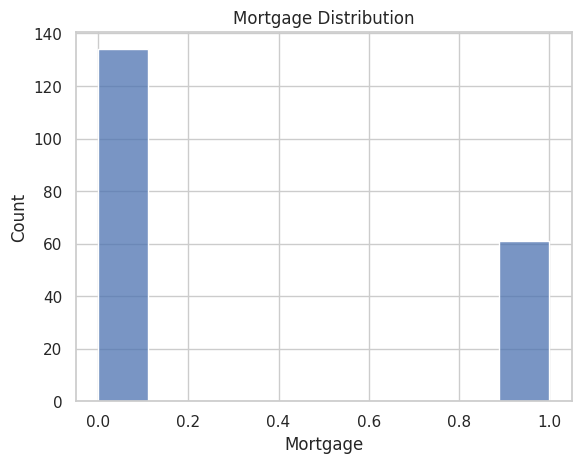

In [55]:
sns.histplot(data = data, x='Mortgage',palette='Set2')

plt.title('Mortgage Distribution')
plt.xlabel('Mortgage')
plt.ylabel('Count')

Text(0, 0.5, 'Number of users')

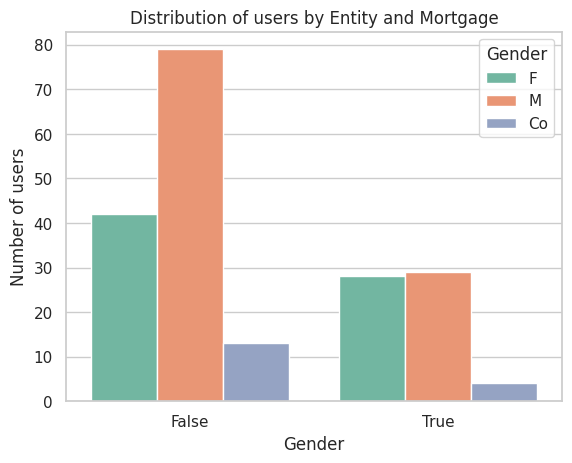

In [56]:
sns.countplot(data=data, x='Mortgage', hue='Gender', palette='Set2')

plt.title('Distribution of users by Entity and Mortgage')
plt.xlabel('Gender')
plt.ylabel('Number of users')

<b>As we can see, in most cases, users do not prefer to take a mortgage for the purchase of real estate</b>